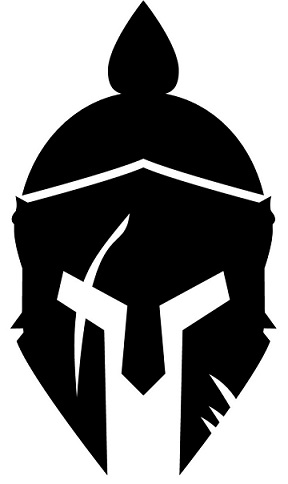
# <CENTER>ClasIAtor</CENTER>
## <CENTER>NClasiator. With RF noise generator</CENTER>

In [3]:
# install opencv
#!pip install opencv-python
# import required libraries
import cv2
import os
import logging
import argparse
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import ipywidgets as widgets

logger = logging.getLogger(__name__)
# signal repository
web = 'https://www.sigidwiki.com/wiki/HF'
repo = '../signals/'

def main():
    print("Clasificación de señales de RF con IA ClasIAtor!")
    print("Modulo diseñado y programado por F. Ochando")
    print("Programado y Evaluado por Antonio Mejia")

if __name__ == "__main__":
    main()

Clasificación de señales de RF con IA ClasIAtor!
Modulo diseñado y programado por F. Ochando
Programado y Evaluado por Antonio Mejia


In [4]:
ficheros = os.listdir(repo) # Lista de ficheros log
# Selecciona el fichero
fichero = widgets.Dropdown(
    options= ficheros, value= ficheros[0], description='Fichero:', disabled= False,
)
logger.warning(f"Select file to load")
display(fichero)
logger.warning(f"If selected continue")

Select file to load


Dropdown(description='Fichero:', options=('225px-Coherent_PSK2.jpg', '225px-Coherent_PSK2.jpg.csv', '225px-STA…

If selected continue


In [5]:
SNR = [3, 6, 12, 18] # Lista de ficheros log
# Selecciona el fichero
snrlist = widgets.Dropdown(
    options= SNR, value= SNR[0], description='SNR:', disabled= False,
)
logger.warning(f"Select SNR value")
display(snrlist)
logger.warning(f"If selected continue")

Select SNR value


Dropdown(description='SNR:', options=(3, 6, 12, 18), value=3)

If selected continue


In [6]:
# read the input image
img = cv2.imread(repo + fichero.value, 0)
logger.warning(f"Loaded: {repo + fichero.value}")
logger.warning(f"Signal = {fichero.value}")
logger.warning(f"Image shape (rows, cols) = {img.shape}")

Loaded: ../../signals/225px-STANAG_4285.jpg
Signal = 225px-STANAG_4285.jpg
Image shape (rows, cols) = (375, 225)


In [7]:
# shape prints the tuple (height,weight,channels)
imgcol = img.shape[1]
imgrow = 260

# Add noise

In [8]:
## Add noise to signal
## RUIDO ALEATORIO ESPÚREO EN TODAS LAS MUESTRAS
SNR=snrlist.value
snr=10**((SNR/10))
Smax=max(img[imgrow][0:224])
N_noise=Smax/snr
img_noise = []
width, height = img.shape
noise_matrix=np.random.randint(0,N_noise,(width, height))
img_noise=np.add(img,noise_matrix)

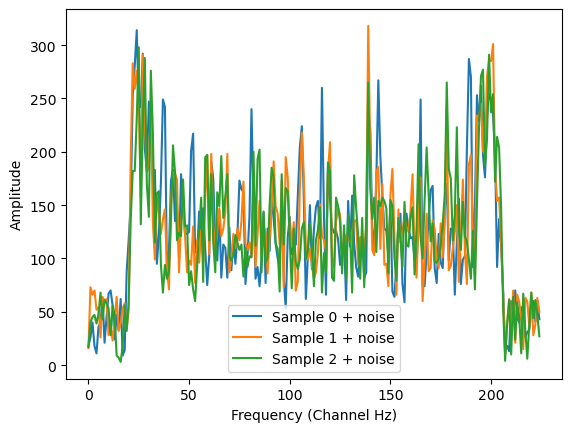

In [9]:
img = img_noise
plt.xlabel("Frequency (Channel Hz)") 
plt.ylabel("Amplitude")
plt.plot(img_noise[100], label='Sample 0 + noise')
plt.plot(img_noise[101], label='Sample 1 + noise')
plt.plot(img_noise[102], label='Sample 2 + noise')
plt.legend()
plt.show()

In [11]:
from joblib import dump, load

clf = load('clasiatorRF.joblib') 

# Predict

In [12]:
prediction = clf.predict(img[:,:224])
size = len(prediction)
print(pd.DataFrame(prediction).value_counts() / size * 100)

4285    89.866667
4415    10.133333
dtype: float64
